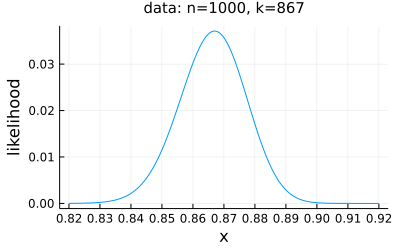

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, size=(400, 250), titlefontsize=10)

n, k = 1000, 867

P1 = plot(p -> pdf(Binomial(n, p), k), 0.82, 0.92; label="",
    xguide="x", yguide="likelihood", title="data: n=$n, k=$k",
    xtick=0:0.01:1, )

confint_clopper_pearson(n, k; α = 0.05) = [0.8443706729528716, 0.8874420356131526]


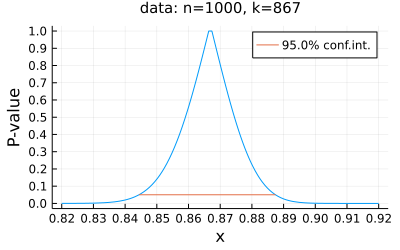

In [2]:
using Distributions
using StatsPlots
default(fmt=:png, size=(400, 250), titlefontsize=10)

function pvalue_clopper_pearson(n, k, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

function confint_clopper_pearson(n, k; α=0.05)
    p_L = quantile(Beta(k, n-k+1), α/2)
    p_U = quantile(Beta(k+1, n-k), 1 - α/2)
    [p_L, p_U]
end

n, k = 1000, 867
α = 0.05
ci = @eval @show confint_clopper_pearson(n, k; α=$α)

P2 = plot(p -> pvalue_clopper_pearson(n, k, p), 0.82, 0.92; label="",
    xguide="x", yguide="P-value", title="data: n=$n, k=$k",
    xtick=0:0.01:1, ytick=0:0.1:1)
plot!(ci, fill(α, 2); label="$(100(1-α))% conf.int.")

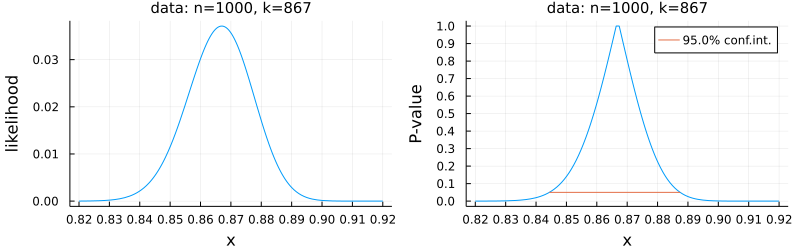

In [3]:
plot(P1, P2; size=(800, 250),
    leftmargin=4Plots.mm, bottommargin=4Plots.mm)